<a href="https://colab.research.google.com/github/nike-2001/ML-Workshop/blob/main/Employee_Attrition_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("EmployeeAttrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
from sklearn import preprocessing
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df_2 = df.apply(le.fit_transform)
df_2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda18e80780>]],
      dtype=object)

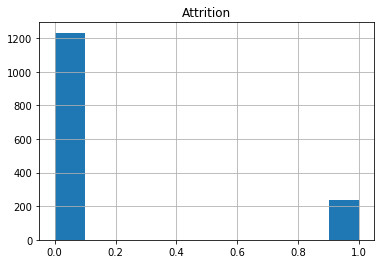

In [ ]:
import matplotlib.pyplot as plt
df_2.hist('Attrition')

In [ ]:
df_2.shape

(1470, 35)

In [ ]:
# Print colmuns that have minimum one NaN value
df.isna().any()
# df.isna().any()

In [ ]:
(df_2 != df_2.iloc[0]).any()

Age                          True
Attrition                    True
BusinessTravel               True
DailyRate                    True
Department                   True
DistanceFromHome             True
Education                    True
EducationField               True
EmployeeCount               False
EmployeeNumber               True
EnvironmentSatisfaction      True
Gender                       True
HourlyRate                   True
JobInvolvement               True
JobLevel                     True
JobRole                      True
JobSatisfaction              True
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                  True
NumCompaniesWorked           True
Over18                      False
OverTime                     True
PercentSalaryHike            True
PerformanceRating            True
RelationshipSatisfaction     True
StandardHours               False
StockOptionLevel             True
TotalWorkingYears            True
TrainingTimesL

In [ ]:
# EmployeeCount Stdhours Over18
# Remove columns which have same value in all rows
df_2=df_2.loc[:, (df_2 != df_2.iloc[0]).any()]
df_2.shape

(1470, 32)

In [ ]:
Y = df_2['Attrition']
X = df_2.drop(['Attrition'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
# Split Training and Testing Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000,\
                               max_depth=7,\
                              criterion='gini')
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,\
f1_score,precision_score,recall_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,Y_predict)
# Calculate Accuracy
acc = accuracy_score(Y_test,Y_predict)
prec = precision_score(Y_test,Y_predict)
recall = recall_score(Y_test,Y_predict)
f1 = f1_score(Y_test,Y_predict)
#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc, prec,recall,f1)

Confusion Matrix 
 [[298   2]
 [ 61   7]]
Accuracy :  0.8288043478260869 0.7777777777777778 0.10294117647058823 0.1818181818181818


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=500, \
                           learning_rate=0.5,\
                           random_state=7)
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test) 
acc = accuracy_score(Y_test,Y_predict)
prec = precision_score(Y_test,Y_predict)
recall = recall_score(Y_test,Y_predict)
f1 = f1_score(Y_test,Y_predict)
#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)
print("precision : ",prec)
print("Recall : ",recall)
print("F1 score : ",f1)

Confusion Matrix 
 [[298   2]
 [ 61   7]]
Accuracy :  0.8614130434782609
precision :  0.6808510638297872
Recall :  0.47058823529411764
F1 score :  0.5565217391304348


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = { #10,50,100,500,1000
    'n_estimators': [500,1000,5000],
    'learning_rate':[0.5,0.75,0.95]
}
adb=AdaBoostClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=adb, param_grid=param_grid, cv= 2, verbose=1)
CV_rfc.fit(X_train, Y_train)

print(CV_rfc.best_params_)
print(CV_rfc.cv_results_['mean_test_score'])

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.4min finished


{'learning_rate': 0.5, 'n_estimators': 500}
[0.8584392  0.85027223 0.83030853 0.85299456 0.8430127  0.82758621
 0.853902   0.8384755  0.82849365]
